# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [3]:
# Dependencies and Setup
import hvplot.pandas  # noqa
import pandas as pd

import requests
import matplotlib as plt
#Import API key
from api_keys import geoapify_key

In [19]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../WeatherPy/output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mandan,46.8267,-100.8896,17.56,60,0,2.57,US,1686540638
1,1,Vilyuchinsk,52.9306,158.4028,23.15,52,87,1.49,RU,1686540638
2,2,Balyqshy,47.0667,51.8667,28.00,20,40,8.00,KZ,1686540638
3,3,Anadyr,64.7500,177.4833,11.28,58,0,4.00,RU,1686540638
4,4,Shalqar,47.8333,59.6000,28.89,16,100,6.21,KZ,1686540638


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
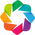

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

In [89]:
%%capture --no-display


#Configure the map plot
import geopandas as gpd
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
import cartopy

gv.extension('bokeh', 'matplotlib')


import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
tile=hv.Tiles('https://tile.openstreetmap.org/{Z}/{X}/{Y}.png', name="OSM").opts(width=800, height=600)
city_data_df.hvplot.points('Lng', 'Lat', geo=True, alpha=0.4, size = "Humidity",
                       xlim=(-180, 180), ylim=(-70, 85), tiles=tile,legend='right',color = "City",)

#city_data_df.hvplot(global_extent=True, frame_height=450, tiles=True)

# Display the map
# YOUR CODE HERE

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [93]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_cities_df=city_data_df.loc[city_data_df['Max Temp']<28]
#i am only picky about temperature
ideal_cities_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mandan,46.8267,-100.8896,17.56,60,0,2.57,US,1686540638
1,1,Vilyuchinsk,52.9306,158.4028,23.15,52,87,1.49,RU,1686540638
3,3,Anadyr,64.7500,177.4833,11.28,58,0,4.00,RU,1686540638
5,5,Praia da Vitória,38.7333,-27.0667,19.14,88,20,7.30,PT,1686540639
6,6,Glace Bay,46.1969,-59.9570,12.10,92,75,4.63,CA,1686540639
...,...,...,...,...,...,...,...,...,...,...
287,287,Kislyakovskaya,46.4417,39.6750,16.14,85,98,2.91,RU,1686540696
288,288,Agăş,46.4833,26.2167,11.00,99,100,1.47,RO,1686540696
289,289,Tieli,46.9500,128.0500,21.85,57,100,0.56,CN,1686540696
290,290,Ipatovo,45.7181,42.9036,21.44,77,39,1.50,RU,1686540696


### Step 3: Create a new DataFrame called `hotel_df`.

In [117]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df=ideal_cities_df.iloc[: , [1,8,2,3,5]].copy()
hotel_df['Hotel Name']=""
hotel_df.head()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City,Country,Lat,Lng,Humidity,Hotel Name
0,Mandan,US,46.8267,-100.8896,60,
1,Vilyuchinsk,RU,52.9306,158.4028,52,
3,Anadyr,RU,64.7500,177.4833,58,
5,Praia da Vitória,PT,38.7333,-27.0667,88,
6,Glace Bay,CA,46.1969,-59.9570,92,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [ ]:
# Set parameters to search for a hotel
radius = # YOUR CODE HERE
params = {
    # YOUR CODE HERE
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    name_address = # YOUR CODE HERE
    
    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
kapaa - nearest hotel: Pono Kai Resort
hilo - nearest hotel: Dolphin Bay Hotel
banda - nearest hotel: #acnindiafy21
makakilo city - nearest hotel: Embassy Suites by Hilton Oahu Kapolei
kahului - nearest hotel: Maui Seaside Hotel
gat - nearest hotel: No hotel found
laguna - nearest hotel: Holiday Inn Express & Suites
tikaitnagar - nearest hotel: No hotel found
san quintin - nearest hotel: Jardines Hotel
santa rosalia - nearest hotel: Hotel del Real
narwar - nearest hotel: No hotel found
port hedland - nearest hotel: The Esplanade Hotel
roebourne - nearest hotel: No hotel found
saint-francois - nearest hotel: Chez Lily
capoterra - nearest hotel: Rosa Hotel
stolac - nearest hotel: Bregava
guerrero negro - nearest hotel: Plaza sal paraiso


,City,Country,Lat,Lng,Humidity,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,Pono Kai Resort
51,hilo,US,19.7297,-155.0900,83,Dolphin Bay Hotel
63,banda,IN,25.4833,80.3333,52,#acnindiafy21
81,makakilo city,US,21.3469,-158.0858,81,Embassy Suites by Hilton Oahu Kapolei
152,kahului,US,20.8947,-156.4700,60,Maui Seaside Hotel
197,gat,IL,31.6100,34.7642,100,No hotel found
211,laguna,US,38.4210,-121.4238,79,Holiday Inn Express & Suites
240,tikaitnagar,IN,26.9500,81.5833,59,No hotel found
265,san quintin,MX,30.4833,-115.9500,74,Jardines Hotel
340,santa rosalia,MX,27.3167,-112.2833,56,Hotel del Real


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [120]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
hotel_df.hvplot.points('Lng', 'Lat', geo=True, alpha=0.4, size = "Humidity",
                       xlim=(-180, 180), ylim=(-70, 85), tiles=tile,legend='right',color = "City", 
                       hover_cols = ["Hotel Name","Country"])

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)